# Geospatial analysis_2

<img src="img/logo/xarray.png" width="300"/>

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import geopandas as gpd # vector data analysis
from shapely import geometry # raster data analysis

import xarray as xr # raster data analysis

%matplotlib inline

## Raster data analysis

### Raster files

There are different raster data types, such as the popular NetCDF (.nc) and GeoTIFF (.tif).

1. NetCDF is a binary storage format for many different kinds of rectangular data. Examples include atmosphere and ocean model output, satellite images, and timeseries data. NetCDF files are intended to be device independent, and the dataset may be queried in a fast, random-access way. More information about NetCDF files can be found [here](https://www.unidata.ucar.edu/software/netcdf/).

2. GeoTIFF is a public domain metadata standard that enables georeferencing information to be embedded within an image file. The GeoTIFF format embeds geospatial metadata into image files such as aerial photography, satellite imagery, and digitized maps so that they can be used in GIS applications. More information about GeoTIFF files can be found [here](https://www.omnisci.com/technical-glossary/geotiff).

<img src="img/raster-concept.png" width="500"/>

# `xarray`

1. `xarray` is an open source project and Python package that makes working with `labelled` multi-dimensional arrays simple, efficient, and fun! It is actively being developed in conjunction with many other packages under the [Pangeo](https://pangeo.io/) umbrella.

2. Xarray introduces `labels` in the form of dimensions, coordinates and attributes on top of raw `NumPy-like` arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 

3. Xarray is inspired by and borrows heavily from `pandas`, the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with `netCDF` files (but not only `netCDF` files), and it integrates tightly with **dask** for **parallel computing**.

## Sea surface temperature example

An example NetCDF file containing monthly means of sea surface temperature over 160 years can be found [here](http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.ersst.v4.html). We'll use the `xarray` package to read this file, which has already been saved into the `data` directory.

One of the useful things about `xarray` is that it doesn't deal with the numbers in the file until it has to. This is called **lazy evaluation**. It will note the operations you want done, but won't actually perform them until it needs to spit out numbers.

**Viewing metadata is instantaneous since no calculations need to be done, even if the file is huge.**

An xarray data object is a **"Dataset"** or **"DataArray"**.

In [3]:
ds = xr.open_dataset('data/sst.mnmean.v4.nc')

# overview of metadata for file
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1946, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/28)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    cdm_data_type:           Grid
    project:                 NOAA Extended Reconstructed Sea Surface Temperat...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    References:              http://www.ncdc.noaa.gov/data-access/marineocean...
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...

<div class="alert alert-info">Note that since we have two variables contained in ds, ds is <b>xarray.Dataset</b>, instead of <b>xarray.DataArray</b>.</div>

In [4]:
# view the metadata or attributes
ds.attrs

{'history': "created 10/2014 by CAS using NCDC's ERSST V4 ascii values",
 'title': 'NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)',
 'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'citation': 'Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.',
 'comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'Conventions': 'CF-1.2',
 'institution': 'This version written at NOAA/ESRL PSD: obtained from NOAA/NESDIS/National Climatic Data Center',
 'keywords_voc

In [5]:
# get the title
ds.title

'NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)'

### variables vs. coordinates

When files are read in, xarray data contain the "variables" and the "coordinates" that those variables are in reference to. For example, in the present dataset, we have the following variables and coordinates:

In [6]:
ds.data_vars

Data variables:
    time_bnds  (time, nbnds) float64 1.972e+04 1.975e+04 ... 7.892e+04 7.895e+04
    sst        (time, lat, lon) float32 ...

In [7]:
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

### check variables

In [8]:
#  get the sst variable and the result will be xarray.DataArray
ds['sst']

<xarray.DataArray 'sst' (time: 1946, lat: 89, lon: 180)>
[31174920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [9]:
type(ds['sst'])

xarray.core.dataarray.DataArray

In [10]:
# sst variable (the same as above)
ds.sst

<xarray.DataArray 'sst' (time: 1946, lat: 89, lon: 180)>
[31174920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [11]:
# time_bnds: two columns representing the duration of one month (from the begining day to the ending day)
ds['time_bnds']

<xarray.DataArray 'time_bnds' (time: 1946, nbnds: 2)>
array([[19723., 19754.],
       [19754., 19782.],
       [19782., 19813.],
       ...,
       [78861., 78892.],
       [78892., 78923.],
       [78923., 78952.]])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Dimensions without coordinates: nbnds
Attributes:
    long_name:  Time Boundaries

In [12]:
# same as above
ds.time_bnds

<xarray.DataArray 'time_bnds' (time: 1946, nbnds: 2)>
array([[19723., 19754.],
       [19754., 19782.],
       [19782., 19813.],
       ...,
       [78861., 78892.],
       [78892., 78923.],
       [78923., 78952.]])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Dimensions without coordinates: nbnds
Attributes:
    long_name:  Time Boundaries

<div class="alert alert-info">Note that since we have only one variable, ds['sst'] (or ds.sst) and ds['time_bnds'] (or ds.time_bnds) are both <b>xarray.DataArray</b></div>

#### check the shape and units of the variables

In [13]:
ds.sst.shape

(1946, 89, 180)

In [14]:
ds.sst.units

'degC'

In [15]:
ds.time_bnds.shape

(1946, 2)

In [16]:
# NOT every variable has units!
# below will throw error
# ds.time_bnds.units

**check coordinates of the whole Dataset**

In [17]:
# get the coords name
ds.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

In [18]:
ds.time

<xarray.DataArray 'time' (time: 1946)>
array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ..., '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 78923.]

In [19]:
ds.lon

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

In [20]:
ds.lat

<xarray.DataArray 'lat' (lat: 89)>
array([ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,  66.,
        64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,  44.,  42.,
        40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,  18.,
        16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,
        -8., -10., -12., -14., -16., -18., -20., -22., -24., -26., -28., -30.,
       -32., -34., -36., -38., -40., -42., -44., -46., -48., -50., -52., -54.,
       -56., -58., -60., -62., -64., -66., -68., -70., -72., -74., -76., -78.,
       -80., -82., -84., -86., -88.], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    units:               degrees_north
    long_name:           Latitude
    actual_range:        [ 88. -88.]
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  center

In [21]:
ds.lon.units

'degrees_east'

In [22]:
ds.lat.units

'degrees_north'

**you can also check the coordinates of each DataArray**

In [23]:
ds.sst.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

In [24]:
ds.sst.lon

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

## Extract values of the coordinates or variables

Note that you can always extract the actual values of the **coordinates** or **variables** of your dataset using `.values` at the end. Be careful when you use this since it might be a lot of information and could crash your laptop memory. **Always check the metadata without using `.values` first to see how large the arrays are you'll be reading in**.

In [25]:
# OK. only 89 values so we can safely use .values to extract all the lat as a numpy array
ds.lat

<xarray.DataArray 'lat' (lat: 89)>
array([ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,  66.,
        64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,  44.,  42.,
        40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,  18.,
        16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.,  -2.,  -4.,  -6.,
        -8., -10., -12., -14., -16., -18., -20., -22., -24., -26., -28., -30.,
       -32., -34., -36., -38., -40., -42., -44., -46., -48., -50., -52., -54.,
       -56., -58., -60., -62., -64., -66., -68., -70., -72., -74., -76., -78.,
       -80., -82., -84., -86., -88.], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
Attributes:
    units:               degrees_north
    long_name:           Latitude
    actual_range:        [ 88. -88.]
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  center

In [26]:
ds.lat.values

array([ 88.,  86.,  84.,  82.,  80.,  78.,  76.,  74.,  72.,  70.,  68.,
        66.,  64.,  62.,  60.,  58.,  56.,  54.,  52.,  50.,  48.,  46.,
        44.,  42.,  40.,  38.,  36.,  34.,  32.,  30.,  28.,  26.,  24.,
        22.,  20.,  18.,  16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,
         0.,  -2.,  -4.,  -6.,  -8., -10., -12., -14., -16., -18., -20.,
       -22., -24., -26., -28., -30., -32., -34., -36., -38., -40., -42.,
       -44., -46., -48., -50., -52., -54., -56., -58., -60., -62., -64.,
       -66., -68., -70., -72., -74., -76., -78., -80., -82., -84., -86.,
       -88.], dtype=float32)

In [27]:
# this will have 1946 * 89 * 180 = 31 million data
# although a bit slow, still OK to extract all of them! 
ds.sst

<xarray.DataArray 'sst' (time: 1946, lat: 89, lon: 180)>
[31174920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [28]:
ds.sst.values

array([[[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   n

In [29]:
x = ds.sst.values

In [30]:
x.shape

(1946, 89, 180)

### *Exercise*

> check the time coordinate and judge whether it is safe to extract all the time data

In [31]:
ds.time.shape

(1946,)

In [32]:
ds.time.values

array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ...,
       '2015-12-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [33]:
31*1e6*8 / 1024 /1024 #31 million bytes * 8 bytes / 1024 kilobytes / 1024 MB = ans in MB

236.51123046875

## Select data

Analogously to how we selected data from `pandas` dataframes using `.loc` (**name-based**) and `.iloc` (**location-based**), we extract data from `xarray` datasets using `.sel` and `.isel`. 

This means that we can subselect from the data variable "sst" with respect to the coordinates. As we can see in the following cell, the variable "sst" has coordinates "lat", "lon", and "time".

In [34]:
ds.sst.coords

Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

We'll start with a small example: let's choose a single time to plot. Here is how to choose a specific time:

In [35]:
ds_single = ds.sst.sel(time='1954-6-1')

In [36]:
ds_single

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

## Now let's plot it!

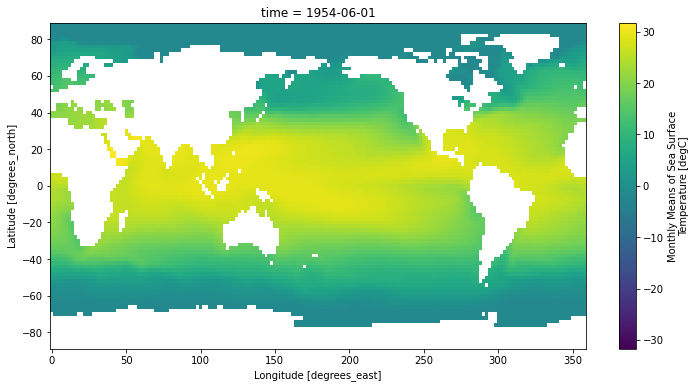

In [37]:
# quick visualization
# note that xarray is smart enough to use lon as the x axis and lat as the y axis
ds_single.plot(figsize=(12,6), cmap="viridis")

#### Use `cartopy` to plot!

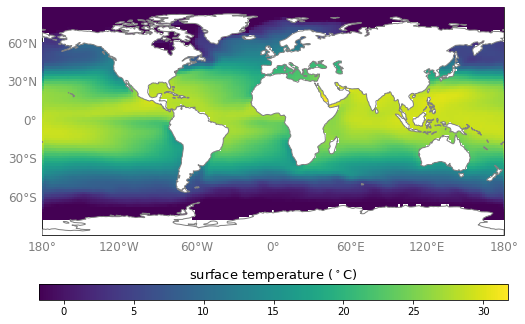

In [38]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.pcolormesh(ds_single.lon.values, ds_single.lat.values, ds_single.values, transform=ccrs.PlateCarree(), cmap="viridis", zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.right_labels = False
gl.top_labels = False


gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)

centered on 180 longitude

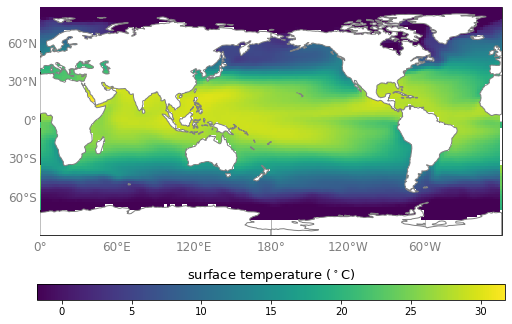

In [39]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.pcolormesh(ds_single.lon.values, ds_single.lat.values, ds_single.values, transform=ccrs.PlateCarree(), cmap="viridis", zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.right_labels = False
gl.top_labels = False


gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)


### *Exercise*

> Use Robinson projection for the above figure

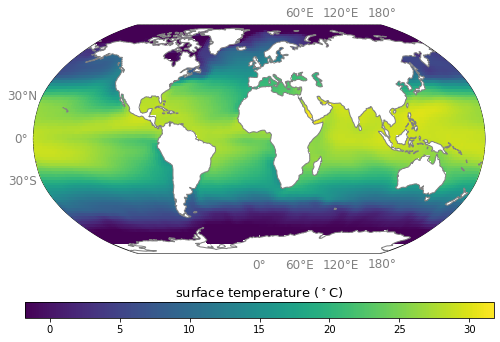

In [40]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.Robinson())

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.pcolormesh(ds_single.lon.values, ds_single.lat.values, ds_single.values, transform=ccrs.PlateCarree(), cmap="viridis", zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.right_labels = False
gl.top_labels = False


gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)

### continue our data selection:

You can also select a "nearest" point in time if you aren't sure exactly when your time slices are:

In [41]:
ds['sst'].sel(time='1954-06-01')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [42]:
ds['sst'].sel(time='1954-05-23', method='nearest')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

We can also select by coordinate range using `slice`, such as in the following cell where we choose all times between (and including) the years 1900 and 1950, longtitudes between -100 and -80 degrees, and latitude between 16 and 30 degrees.

**note** that we need to add 360 to the longitude to convert it from our normal -180-180 range to 0-360 range

In [43]:
ds.sst.sel(time=slice('1900','1950'), lon=slice(-100+360, -80+360), lat=slice(30,16))

<xarray.DataArray 'sst' (time: 612, lat: 8, lon: 11)>
array([[[  nan,   nan, ...,   nan, 21.79],
        [  nan,   nan, ..., 21.21, 22.67],
        ...,
        [  nan,   nan, ..., 26.91, 26.99],
        [28.1 , 27.83, ..., 27.12, 27.19]],

       [[  nan,   nan, ...,   nan, 21.85],
        [  nan,   nan, ..., 21.3 , 22.83],
        ...,
        [  nan,   nan, ..., 26.79, 26.82],
        [28.12, 28.  , ..., 26.96, 26.94]],

       ...,

       [[  nan,   nan, ...,   nan, 25.05],
        [  nan,   nan, ..., 25.16, 25.76],
        ...,
        [  nan,   nan, ..., 28.24, 28.29],
        [29.09, 28.75, ..., 28.2 , 28.27]],

       [[  nan,   nan, ...,   nan, 23.08],
        [  nan,   nan, ..., 22.84, 23.83],
        ...,
        [  nan,   nan, ..., 27.21, 27.27],
        [28.64, 28.13, ..., 27.31, 27.41]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 30.0 28.0 26.0 24.0 22.0 20.0 18.0 16.0
  * lon      (lon) float32 260.0 262.0 264.0 266.0 ... 274.0 276.0 278.0 280.0
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 1950-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

Now we use `isel` by index, such as in the following cell where we select the first index of data in terms of with time, longitude, and latitude:

In [44]:
ds.sst.isel(time=0, lon=0, lat=0)

<xarray.DataArray 'sst' ()>
array(-1.8, dtype=float32)
Coordinates:
    lat      float32 88.0
    lon      float32 0.0
    time     datetime64[ns] 1854-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [45]:
ds.sst.isel(time=[0,1], lon=np.arange(0,10), lat=0)

<xarray.DataArray 'sst' (time: 2, lon: 10)>
array([[-1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8],
       [-1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8]],
      dtype=float32)
Coordinates:
    lat      float32 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values


### _Exercise_

> get the first five time slots, first five longitude and first four latitude of your sst variable


In [46]:
ds.sst.isel(time=np.arange(0,5),lon=np.arange(0,5),lat=np.arange(0,5))

<xarray.DataArray 'sst' (time: 5, lat: 5, lon: 5)>
array([[[-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -0.91, -0.19]],

       [[-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.69, -0.61, -0.32]],

       [[-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.76, -1.62, -1.6 , -0.93, -0.29]],

       [[-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.78, -1.69, -1.7 , -1.2 , -0.44]],

       [[-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , -1.8 , -1.8 ],
        [-1.61, -1.2 , -0.93, -0.11,  0.33]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 1854-05-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

## Calculations

You can do basic calculations using `xarray`, such as take the mean. You can input the **coordinate** or **coordinates** you want to take the operation over in the function call, which will **collapse** that direction (directions)!

In [47]:
ds.sst

<xarray.DataArray 'sst' (time: 1946, lat: 89, lon: 180)>
array([[[-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        [-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        [-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        [-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.8 , -1.8 , ..., -1.8 , -1.8 ],
        [-1.58, -1.56, ..., -1.63, -1.6 ],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [48]:
# collapse the time
ds.sst.mean('time')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.800032 , -1.800032 , -1.800032 , ..., -1.800032 , -1.800032 ,
        -1.800032 ],
       [-1.7993122, -1.7992609, -1.799163 , ..., -1.7997801, -1.7996566,
        -1.7995386],
       [-1.7982019, -1.7976468, -1.797369 , ..., -1.7992452, -1.7990552,
        -1.7985619],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [49]:
# collapse the lat and lon
ds.sst.mean(['lat','lon'])

<xarray.DataArray 'sst' (time: 1946)>
array([13.546087, 13.626141, 13.634883, ..., 14.027146, 14.177272,
       14.25159 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2016-02-01

### _Exercise_

> calculate the mean sst for each latitude (aka, collapse the longitude) and plot the mean sst with time as axis and latitude as y axis and sst as the color. Hint: You can do this in a single line!


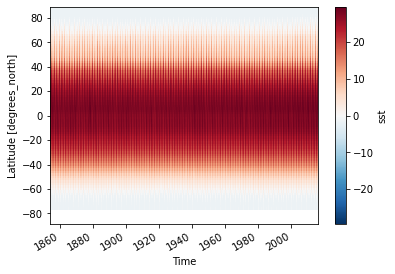

In [59]:
ds.sst.mean('lon').plot(x='time')

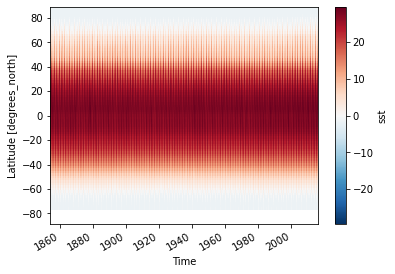

In [60]:
ds.sst.mean('lon').T.plot()

## Groupby

Like in `pandas`, we can use the `groupby` method to do some neat things.

Let's group by season and calculate the mean sst for each season.

In [61]:
seasonal_mean = ds.groupby('time.season').mean('time') # it will collapse time and keep the unique season
seasonal_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, season: 4, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (season, nbnds) float64 4.937e+04 4.94e+04 ... 4.94e+04 4.943e+04
    sst        (season, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan

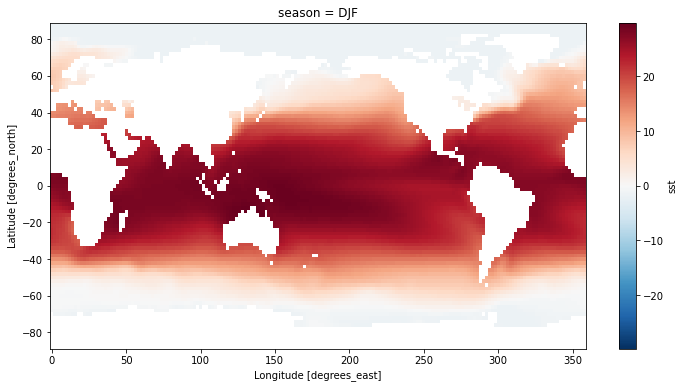

In [62]:
# plot Dec-Jan-Feb
seasonal_mean.sst.isel(season=0).plot(figsize=(12, 6))


### _Exercise_

> use `sel` instead of `isel` to plot the Dec-Jan-Feb


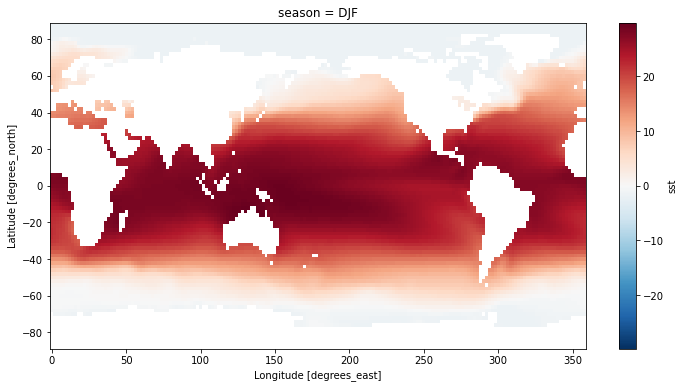

In [66]:
# plot Dec-Jan-Feb
seasonal_mean.sst.sel(season='DJF').plot(figsize=(12, 6))

Let's group by year and calculate the mean sst for each year.

In [67]:
year_mean = ds.groupby('time.year').mean('time')

In [68]:
year_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, year: 163, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * year       (year) int64 1854 1855 1856 1857 1858 ... 2013 2014 2015 2016
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (year, nbnds) float64 1.989e+04 1.992e+04 ... 7.891e+04 7.894e+04
    sst        (year, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan

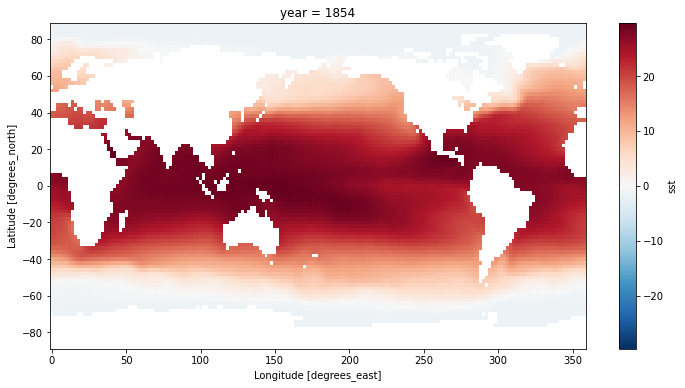

In [69]:
# yearly average
# year_mean = ds.groupby('time.year').mean('time')

year_mean.sst.isel(year=0).plot(figsize=(12, 6))

# deal with GeoTIFF file

### let's read in a GeoTIFF (.tif) raster file using xarray

Our example file is BO2_tempmean_ss_lonlat.tif, which is the sea surface mean temperature

In [70]:
da = xr.open_rasterio("data/BO2_tempmean_ss_lonlat.tif")

In [71]:
da

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 89.96 89.88 89.79 89.71 ... -89.71 -89.79 -89.88 -89.96
  * x        (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9 180.0
Attributes:
    transform:      (0.08333333333333333, 0.0, -180.0, 0.0, -0.08333333333333...
    crs:            +init=epsg:4326
    res:            (0.08333333333333333, 0.08333333333333333)
    is_tiled:       0
    nodatavals:     (-3.4e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

rename x and y to lon and lat

In [72]:
# only do this once! Don't repeat the cell. 
# The reason is that after you did the renaming, the name is already changed
da = da.rename({"x": "lon", "y": "lat"})

In [73]:
da

<xarray.DataArray (band: 1, lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    transform:      (0.08333333333333333, 0.0, -180.0, 0.0, -0.08333333333333...
    crs:            +init=epsg:4326
    res:            (0.08333333333333333, 0.08333333333333333)
    is_tiled:       0
    nodatavals:     (-3.4e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [74]:
# select our variable
da_single = da.sel(band=1)

In [75]:
da_single

<xarray.DataArray (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
    band     int64 1
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    transform:      (0.08333333333333333, 0.0, -180.0, 0.0, -0.08333333333333...
    crs:            +init=epsg:4326
    res:            (0.08333333333333333, 0.08333333333333333)
    is_tiled:       0
    nodatavals:     (-3.4e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

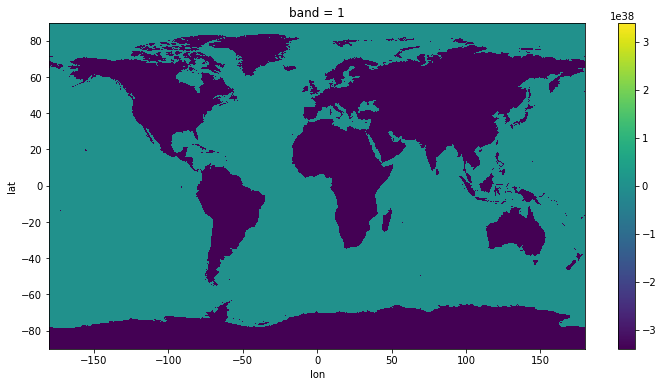

In [76]:
da_single.plot(figsize=(12, 6), cmap='viridis') # what is wrong here?

In [77]:
da_single

<xarray.DataArray (lat: 2160, lon: 4320)>
[9331200 values with dtype=float32]
Coordinates:
    band     int64 1
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    transform:      (0.08333333333333333, 0.0, -180.0, 0.0, -0.08333333333333...
    crs:            +init=epsg:4326
    res:            (0.08333333333333333, 0.08333333333333333)
    is_tiled:       0
    nodatavals:     (-3.4e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [78]:
da.nodatavals

(-3.4e+38,)

In [79]:
# get the good values and assign the original -3.4e+38 to np.nan
# .where: Locations at which to preserve this object's values. dtype must be `bool`. Other locations will become nan
da_nodata = da_single.where(da_single >-3e38)

In [80]:
da_nodata

<xarray.DataArray (lat: 2160, lon: 4320)>
array([[-1.7162135, -1.7162135, -1.7162135, ..., -1.7162703, -1.7162703,
        -1.7162703],
       [-1.7162519, -1.716256 , -1.7162533, ..., -1.7162913, -1.716256 ,
        -1.7162789],
       [-1.7162136, -1.7162135, -1.7162135, ..., -1.7162703, -1.7162703,
        -1.7162703],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    band     int64 1
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Attributes:
    transform:      (0.08333333333333333, 0.0, -180.0, 0.0, -0.08333333333333...
    crs:            +init=epsg:4326
    res:            (0.08333333333333333, 0.08333333333333333)
    is_tiled:       0
    nodatavals:     (-3.4e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

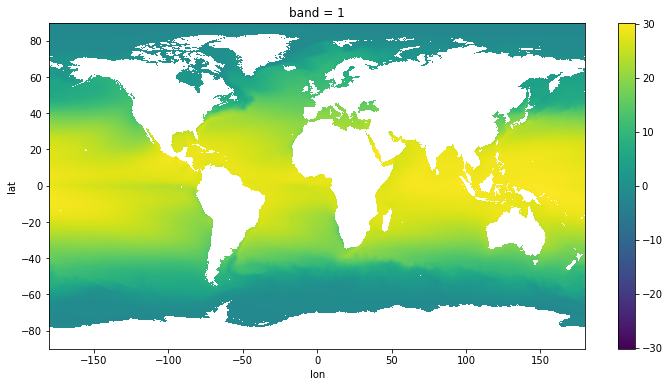

In [81]:
# need to change colorbar to narrow the range
da_nodata.plot(figsize=(12, 6), cmap='viridis')

In [82]:
print(np.nanmin(da_nodata.values))
print(np.nanmax(da_nodata.values))

-1.7977333
30.178629


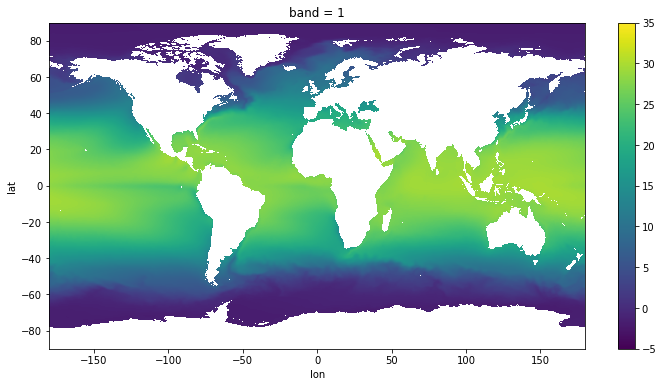

In [83]:
# narrow the range
da_nodata.plot(figsize=(12, 6), cmap='viridis', vmin=-5, vmax=35) 

In [84]:
da_nodata.lon.values

array([-179.95833333, -179.875     , -179.79166667, ...,  179.79166667,
        179.875     ,  179.95833333])

In [85]:
len(da_nodata.lon.values)

4320

In [86]:
da_nodata.lon.values.shape

(4320,)

In [87]:
da_nodata.values

array([[-1.7162135, -1.7162135, -1.7162135, ..., -1.7162703, -1.7162703,
        -1.7162703],
       [-1.7162519, -1.716256 , -1.7162533, ..., -1.7162913, -1.716256 ,
        -1.7162789],
       [-1.7162136, -1.7162135, -1.7162135, ..., -1.7162703, -1.7162703,
        -1.7162703],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

In [88]:
da_nodata.values.shape

(2160, 4320)

In [ ]:
# # use cartopy to do pcolormesh
# fig = plt.figure(figsize=(12, 6))

# ax = fig.add_subplot(projection = ccrs.PlateCarree())

# ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

# mappable = ax.pcolormesh(da_nodata.lon.values, 
#                          da_nodata.lat.values, 
#                          da_nodata.values, 
#                          cmap="viridis", 
#                          transform=ccrs.PlateCarree(),  
#                          vmin=-5, 
#                          vmax=35,
#                          zorder=3)

# gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

# gl.rotate_labels = False
# gl.top_labels = False
# gl.right_labels = False

# gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
# gl.ylabel_style = {'size': 12, 'color': 'gray'}

# cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

# cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)

In [89]:
LON, LAT = np.meshgrid(da_nodata.lon.values, da_nodata.lat.values)

In [90]:
LON.shape

(2160, 4320)

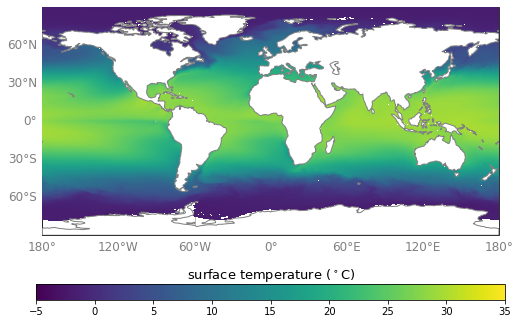

In [91]:
# use cartopy to do pcolormesh
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.pcolormesh(LON, 
                         LAT, 
                         da_nodata.values, 
                         cmap="viridis", 
                         transform=ccrs.PlateCarree(),  
                         vmin=-5, 
                         vmax=35,
                         zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False

gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)


### _Exercise_

> use contourf to plot da_nodata with the same -5 to 35 range with 5 as an increment


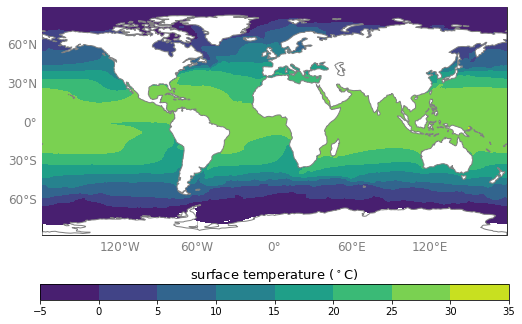

In [106]:
# use cartopy to do contourf
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.contourf(LON, 
                         LAT, 
                         da_nodata.values, 
                         cmap="viridis", 
                         transform=ccrs.PlateCarree(),  
                         vmin=-6, 
                         vmax=36,levels=6,
                         zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False

gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)

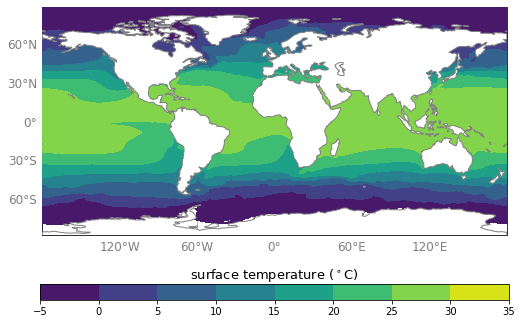

In [108]:
# use cartopy to do contourf



### better levels
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(projection = ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="grey", zorder=3)

mappable = ax.contourf(LON, 
                         LAT, 
                         da_nodata.values, 
                         cmap="viridis", 
                         transform=ccrs.PlateCarree(),  
                         levels=np.arange(-5,36,5),
                         zorder=3)

gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)

gl.rotate_labels = False
gl.top_labels = False
gl.right_labels = False

gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}

cb = fig.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.7, pad=0.15, aspect=30)

cb.set_label(r"surface temperature ($^\circ$C)", fontsize=13, labelpad=-50)

In [109]:
# calculate the mean for each latitude
da_nodata.mean("lon")

<xarray.DataArray (lat: 2160)>
array([-1.7169245, -1.7169247, -1.7169244, ...,        nan,        nan,
              nan], dtype=float32)
Coordinates:
    band     int64 1
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96

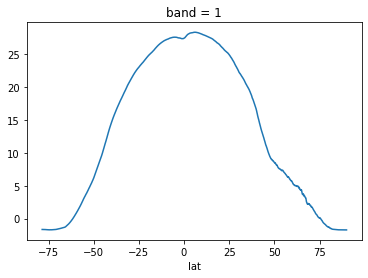

In [110]:
# plot
da_nodata.mean("lon").plot()